# Problema a ser resolvido:

Digamos que você trabalha na área de people analytics e foi solicitado que dividisse os colaboradores em grupos e detectasse as características deles, pois futuramente a empresa iria criar maneiras de estimular os funcionários criando incentivos específicos para cada grupo.

# Importando as bibliotecas

In [1]:
# Biblioteca para evitar mensagens de avisos
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para manipulação e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer

# Análise dos Dados

### Carregando o Arquivo

In [2]:
arquivo = pd.read_csv('HR_Data.csv')
arquivo.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Traduzindo os nomes das colunas

In [3]:
arquivo.columns = ['Nivel_de_Satisfacao', 'Ultima_Avaliacao', 'Numeros_de_Projetos',
       'Media_de_Horas_Trabalhados_no_Mes', 'Tempo_Gasto_na_Empresa', 'Acidente_no_Trabalho', 'Saida_da_Empresa',
       'Promocao_nos_Ultimos_5_Anos', 'Departamento', 'Salario']

### Verificando tamanho da base

In [4]:
arquivo.shape

(14999, 10)

### Verificando se há valores nulos

In [5]:
arquivo.isnull().sum()

Nivel_de_Satisfacao                  0
Ultima_Avaliacao                     0
Numeros_de_Projetos                  0
Media_de_Horas_Trabalhados_no_Mes    0
Tempo_Gasto_na_Empresa               0
Acidente_no_Trabalho                 0
Saida_da_Empresa                     0
Promocao_nos_Ultimos_5_Anos          0
Departamento                         0
Salario                              0
dtype: int64

### Verificando valores unicos

In [6]:
arquivo.nunique()

Nivel_de_Satisfacao                   92
Ultima_Avaliacao                      65
Numeros_de_Projetos                    6
Media_de_Horas_Trabalhados_no_Mes    215
Tempo_Gasto_na_Empresa                 8
Acidente_no_Trabalho                   2
Saida_da_Empresa                       2
Promocao_nos_Ultimos_5_Anos            2
Departamento                          10
Salario                                3
dtype: int64

### Verificando se há linhas duplicadas

In [7]:
print(arquivo.duplicated().sum())

# Deletando as linhas duplicada
arquivo.drop_duplicates(ignore_index=True, inplace = True)
arquivo.shape

3008


(11991, 10)

### Verificando os tipos dos dados

In [8]:
arquivo.dtypes

Nivel_de_Satisfacao                  float64
Ultima_Avaliacao                     float64
Numeros_de_Projetos                    int64
Media_de_Horas_Trabalhados_no_Mes      int64
Tempo_Gasto_na_Empresa                 int64
Acidente_no_Trabalho                   int64
Saida_da_Empresa                       int64
Promocao_nos_Ultimos_5_Anos            int64
Departamento                          object
Salario                               object
dtype: object

# Análise Analítica dos Dados

### Visualizando as estatísticas das variáveis

In [9]:
# Variáveis numéricas
arquivo.describe()

,Nivel_de_Satisfacao,Ultima_Avaliacao,Numeros_de_Projetos,Media_de_Horas_Trabalhados_no_Mes,Tempo_Gasto_na_Empresa,Acidente_no_Trabalho,Saida_da_Empresa,Promocao_nos_Ultimos_5_Anos
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# Variáveis categóricas
arquivo.describe(include="O")

,Departamento,Salario
count,11991,11991
unique,10,3
top,sales,low
freq,3239,5740


# Engenharia dos Dados

### Juntando Departamentos

Juntando esses departamento pois todos são relacionados técnico

In [11]:
arquivo['Departamento'].replace(['support','IT'],'technical', inplace=True)
arquivo['Departamento'].value_counts( normalize = True ) * 100

technical      42.039863
sales          27.011926
RandD           5.787674
product_mng     5.720957
marketing       5.612543
accounting      5.178884
hr              5.012092
management      3.636060
Name: Departamento, dtype: float64

### Transformando dados categóricos em numéricos

In [12]:
arquivo['Salario'].value_counts( normalize = True ) * 100

low       47.869235
medium    43.874573
high       8.256192
Name: Salario, dtype: float64

In [13]:
# Separando as colunas categóricas
categoricas = arquivo.columns[ arquivo.dtypes == object ]

# Instanciando o label encoder
label_encoder = preprocessing.LabelEncoder()

# Transformando os dados
arquivo['Salario'] = label_encoder.fit_transform(arquivo['Salario'])
arquivo['Departamento'] = label_encoder.fit_transform(arquivo['Departamento'])

# Visualizando
for coluna in categoricas:
    
    # Visualizando a porcentagem de valores unicos da coluna
    analise = arquivo[coluna].value_counts( normalize = True ) * 100
    
    # Visualizando a analise 
    print(f'========= {coluna} =========\n\n{analise}\n\n')

========= Departamento =========

7    42.039863
6    27.011926
0     5.787674
5     5.720957
4     5.612543
1     5.178884
2     5.012092
3     3.636060
Name: Departamento, dtype: float64


========= Salario =========

1    47.869235
2    43.874573
0     8.256192
Name: Salario, dtype: float64




###### Dicionário

Departamento:
* technical = 7
* sales = 6
* RandD = 0
* product_mng = 5
* marketing = 4
* accounting = 1
* hr = 2
* management = 3

Salario:
* low = 1
* medium = 2
* high = 0

### Normalizando os dados

In [14]:
# Instanciando o normalizador
normalizador = StandardScaler()
arquivo_norm = normalizador.fit_transform(arquivo)

# Preparação para o Modelo de Machine Learning

### Verificando os principais componentes

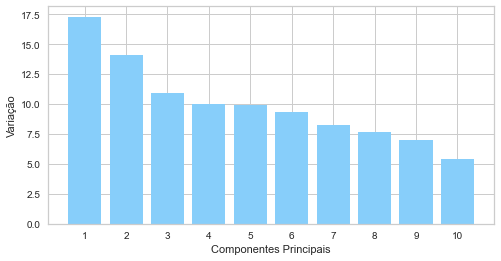

(1) Nivel_de_Satisfacao : 17.29 %
(2) Ultima_Avaliacao : 14.08 %
(3) Numeros_de_Projetos : 10.95 %
(4) Media_de_Horas_Trabalhados_no_Mes : 10.04 %
(5) Tempo_Gasto_na_Empresa : 9.94 %
(6) Acidente_no_Trabalho : 9.33 %
(7) Saida_da_Empresa : 8.25 %
(8) Promocao_nos_Ultimos_5_Anos : 7.67 %
(9) Departamento : 7.0 %
(10) Salario : 5.44 %


In [15]:
# Definindo o número de features
pca = PCA(n_components=len(arquivo.columns))

# Treinando o modelo
arquivo_pca = pca.fit_transform(arquivo_norm)

# Extraindo o ratio das variancias
lista = pca.explained_variance_ratio_ * 100

# Plotando os ratios
plt.figure(figsize=(8,4))
plt.bar(np.arange(1, len(arquivo.columns)+1), lista[:], 
        color='lightskyblue')
plt.xlabel('Componentes Principais')
plt.ylabel('Variação')
plt.xticks(np.arange(1, pca.n_components_+1))
plt.show()

for i, coluna in enumerate(arquivo.columns):
    print(f'({i + 1}) {coluna} : {round(lista[i], 2)} %')

### Definindo o número de cluster utilizando o método elbow

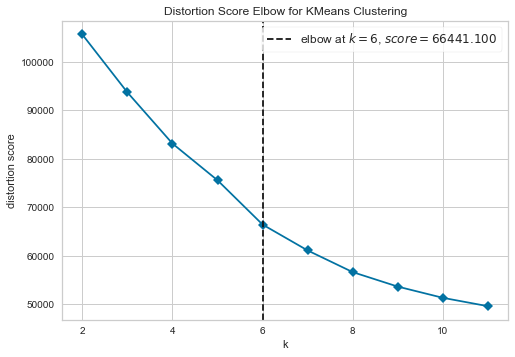

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Instânciando o modelo K-Means
modelo = KMeans(max_iter=1000, random_state=123)

# Podemos usar diversas métricas para definir a quantidade de clusters como: 
# distortion, silhouette e calinski_harabasz.
y_elbow = KElbowVisualizer(modelo, k=(2,12), metric='distortion', timings=False)

y_elbow.fit(arquivo_norm)
y_elbow.show()

Pelo método de elbow, o melhor número de clusters são 6.

# Criação do Modelo de Machine Learning

In [17]:
# Instância o modelo
modelo = KMeans(n_clusters= 6, max_iter=1000, random_state=123)

# Treinando o modelo
modelo.fit(arquivo_norm)

# Prevendo os clusters
cluster_pred = modelo.predict(arquivo_norm)

# Inserindo os clusters no dataset
arquivo['Cluster'] = cluster_pred

### Visualizando duas colunas para ter uma ideia dos clusters

<AxesSubplot:xlabel='Ultima_Avaliacao', ylabel='Nivel_de_Satisfacao'>

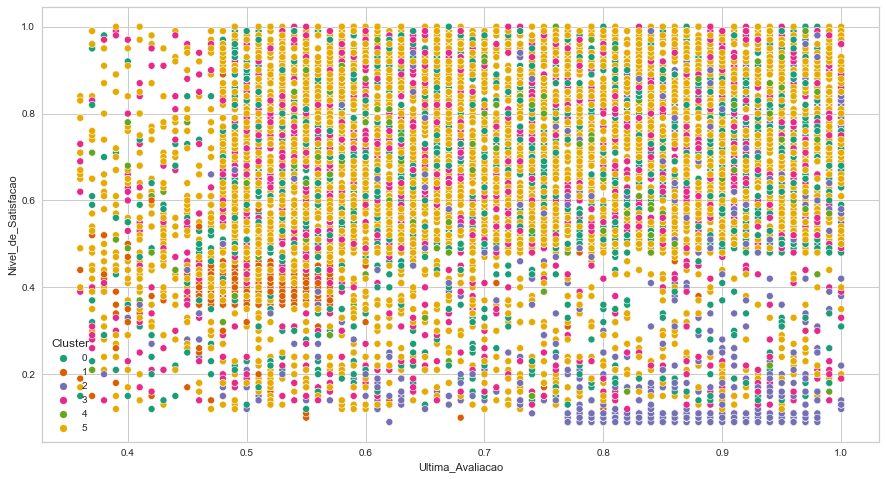

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=arquivo['Ultima_Avaliacao'], y=arquivo['Nivel_de_Satisfacao'], hue=arquivo['Cluster'],
               palette='Dark2', data=arquivo, sizes=(10, 200))

# Explorando nossos clusters

### Cluster 0

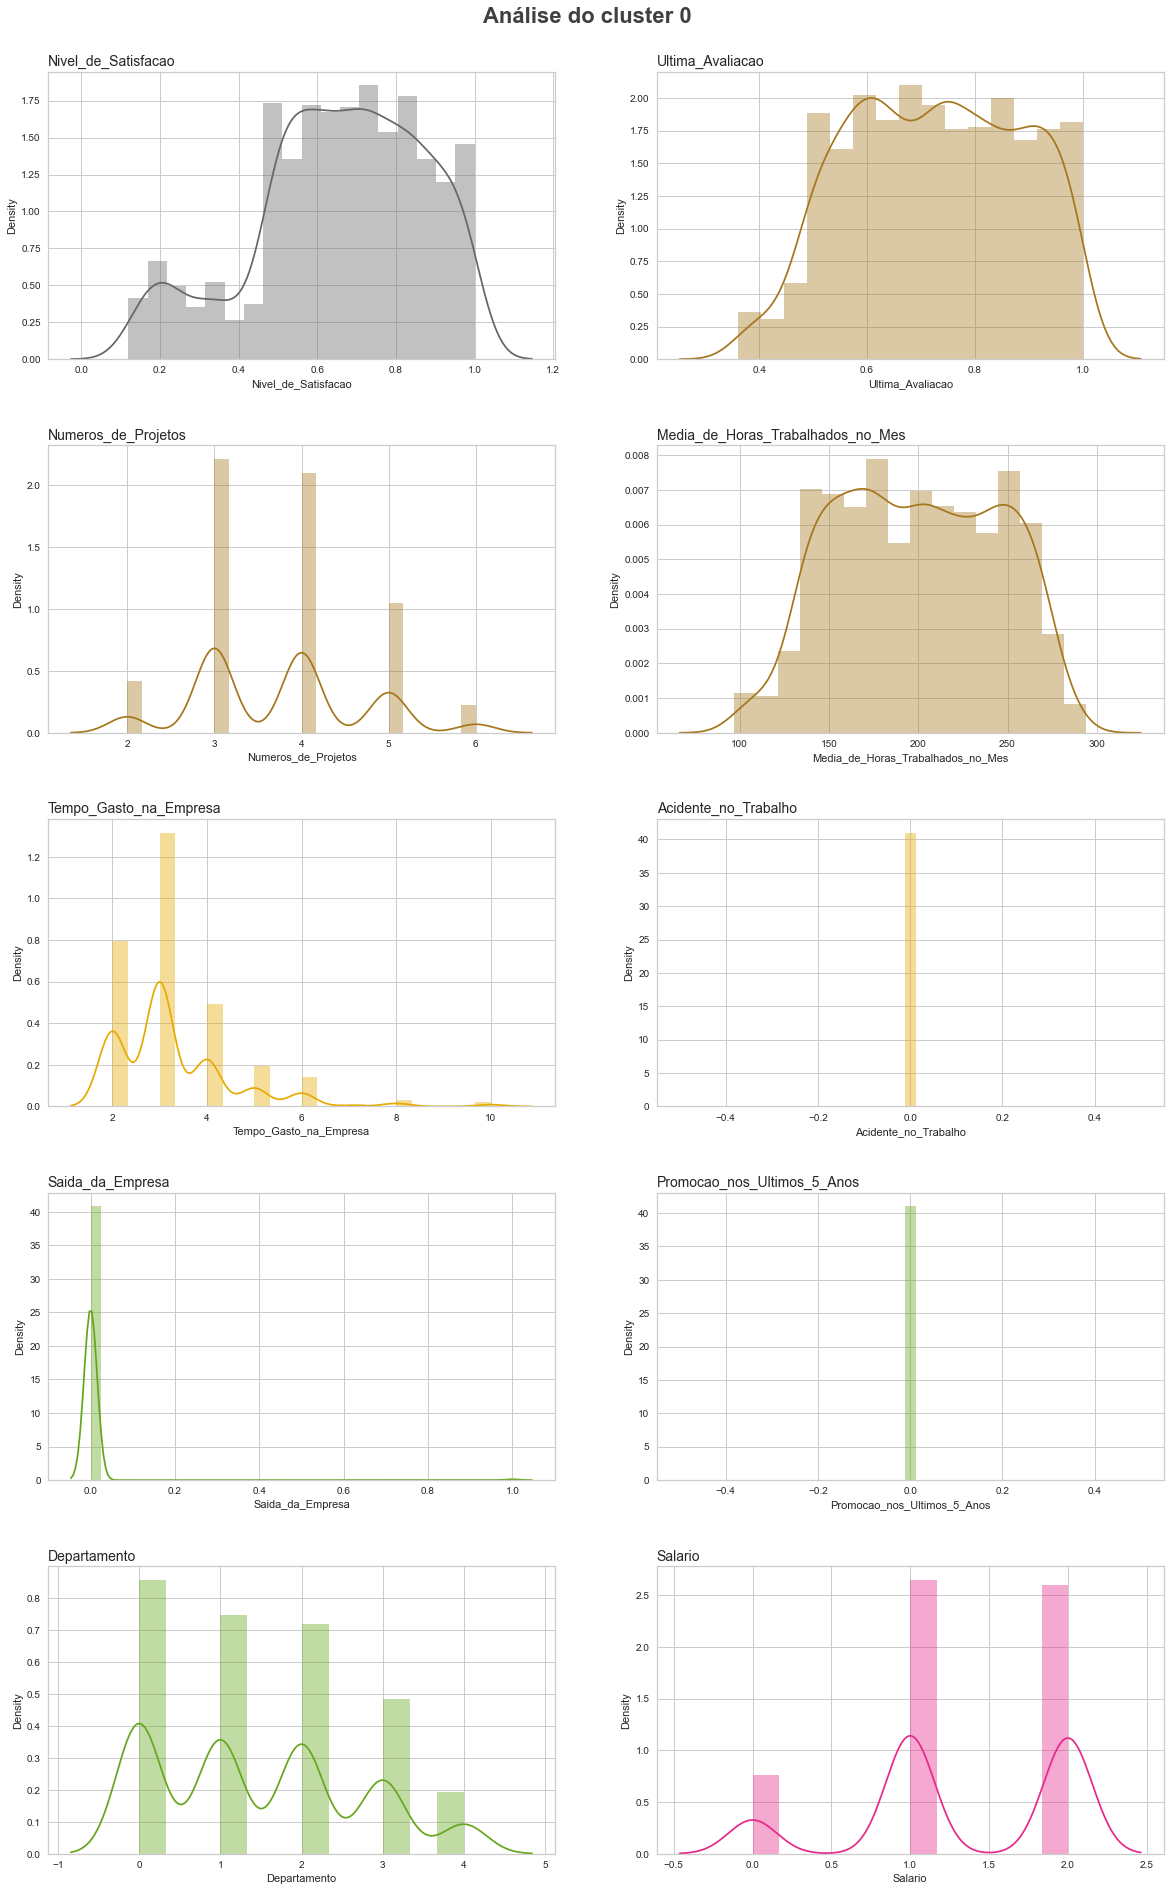

In [19]:
# Separando somente observações com cluster igual a 0
cluster0 = arquivo[ arquivo['Cluster'] == 0 ]
cluster0.drop('Cluster', axis = 1, inplace=True)

# Definindo o tamanho dos gráficos
f, ax = plt.subplots ( figsize=(20,30) )

# Cor de fundo
cor_fundo = '#FFFFFF'
f.set_facecolor( cor_fundo )

# Paleta de Cores
paleta_cores = sns.color_palette( 'Dark2_r', len( cluster0.columns ) * 2 )

# Titulo
plt.suptitle( 'Análise do cluster 0', fontsize=22, color='#404040', fontweight=600 )

# Estruturas para plotar os gráficos
linhas = 5
colunas = 2
posicao = 1

# Plotando os gráficos
for coluna in cluster0.columns:
    
    # Plot no grid -- Distplot
    plt.subplot( linhas, colunas, posicao )
    
    # Titulo
    plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200 )
    
    # Plot
    sns.distplot( cluster0[ coluna ], color=paleta_cores[ posicao ] )
    
    # Mudando de posicao
    posicao += 1
    
# Ajustando o Grid
plt.subplots_adjust( top=0.95, hspace=0.3 )

A partir dessa análise podemos visualizar as características dos nossos colaboradores.
Exemplo:

    - No cluster 0, nenhum colaboradores foi promovido nos últimos 5 anos.
    - Nenhum saiu da empresa.
    - Maioria dos colaboradores recebem um salário baixo ou médio.
    - Maioria pertence aos departamentos de RandD, accounting, hr e management.
    - Podemos continuar essa análise para todas as features.

Dessa forma, vamos registrar todas as características desse clusters, assim podendo tomar uma decisão mais individualizada e acertiva dependendo do nosso propósito.